In [1]:
from IPython.display import clear_output
!pip install openai # import the GPT API
from google.colab import userdata # import the secret key
clear_output()
import time

!pip install pandas
!pip install openpyxl

from openai import OpenAI

def API_call(model, openAI_key, conversation_history, temperature=0.7, top_p=0.7):
    """
    Creates a call to the API
    Takes in a model to choose which API
    Returns the API response (str)
    """
    if model.startswith("gpt"):
        client = OpenAI(api_key=openAI_key)
        response = client.chat.completions.create(
            model=model,
            messages=conversation_history,
            temperature=temperature,
            top_p=top_p
        )
        return response.choices[0].message.content
    else:
        raise ValueError(f"Error, model {model} not found")

OPENAI_API_KEY = userdata.get('OPENAI_KEY')

In [2]:
import pandas as pd

try:
    df = pd.read_excel('exp3_empathy.xlsx', sheet_name='Sheet1')
except FileNotFoundError:
    df = pd.DataFrame(columns=['ideas'])

In [3]:
research_q = "It is your turn to add a post-it note using green hat"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{research_q}
'''

In [4]:
import time

models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}

model = models["gpt4-o"]


# Initialize conversation history
conversation_history = [{"role": "system", "content": "You are a helpful assistant."}]
responses = []

# **Clear existing dataframe or create a new one**
#df = pd.DataFrame(columns=['ideas'])

df = df.drop(df.index)  # Clear the DataFrame

# Generate 50 responses
for i in range(50):

    recent_history = conversation_history[-15:]  # Adjust the number as needed

    # Create the request with the recent history
    request_history = recent_history.copy()
    request_history.append({"role": "user", "content": prompt})

    response = API_call(model, OPENAI_API_KEY, request_history)
    responses.append(response)

    # Add the assistant's response to the full conversation history
    conversation_history.append({"role": "assistant", "content": response})

    time.sleep(10)


# Save responses to DataFrame
df['ideas'] = responses

# Save DataFrame to Excel file
df.to_excel('exp3_empathy.xlsx', index=False, engine='openpyxl')


In [5]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

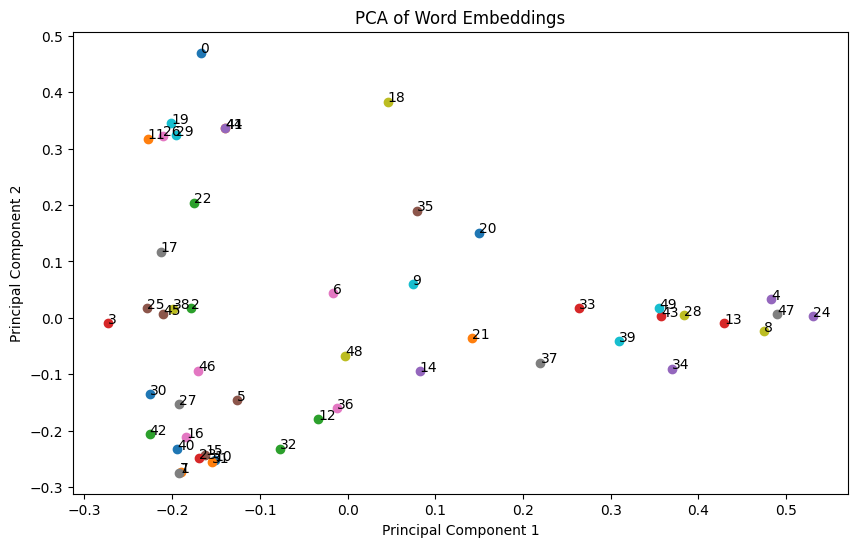

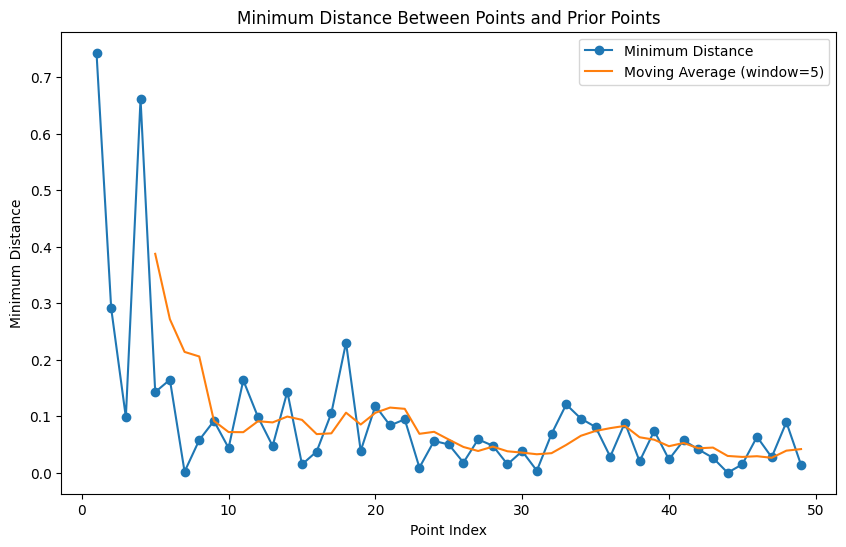

In [6]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'exp3_empathy.xlsx'
df = pd.read_excel(file_path)

# Extract the "ideas" column
ideas = df['ideas']

# Define a variable X for the number of rows to perform embedding on
X = 50  # Change this value to the desired number of rows
ideas_subset = ideas[:X]

# Perform word embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(ideas_subset)
df['vectors'] = embeddings.tolist()


# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the embedded vectors
plt.figure(figsize=(10, 6))
for i, point in enumerate(pca_result):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i))
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute the minimum distance between each point and all prior points
min_distances = []
for i in range(1, len(pca_result)):
    distances = [np.linalg.norm(pca_result[i] - pca_result[j]) for j in range(i)]
    min_distances.append(min(distances))

# Calculate the moving average of the minimum distances
window_size = 5  # Change this to your desired window size
moving_average = pd.Series(min_distances).rolling(window=window_size).mean()

# Plot the minimum distances and the moving average
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(min_distances) + 1), min_distances, marker='o', label='Minimum Distance')
plt.plot(range(1, len(min_distances) + 1), moving_average, label=f'Moving Average (window={window_size})')
plt.title('Minimum Distance Between Points and Prior Points')
plt.xlabel('Point Index')
plt.ylabel('Minimum Distance')
plt.legend()
plt.show()


# Save DataFrame to Excel file
df.to_excel('exp3_empathy.xlsx', index=False, engine='openpyxl')

Constraints

In [8]:
constraint = f'''
It's your turn to add a post-it note using green hat. Create ideas with considering the concept of Analogous empathy. Analogous empathy is a concept in design thinking and user experience that involves understanding and empathizing with individuals who are in situations analogous to the ones you're designing for. These individuals may not be the direct users of the product or service, but their experiences, challenges, and behaviors can provide valuable insights that can be applied to the design process.

How Analogous Empathy Works:
Identify Analogous Situations: Look for situations or contexts that share similarities with the problem you're trying to solve. These could be situations that involve similar emotions, challenges, or interactions.
Observe and Engage: Study and interact with people in these analogous situations. This might involve interviews, observations, or participatory activities to gain a deep understanding of their experiences.
Extract Insights: Analyze the information gathered to identify patterns, strategies, and behaviors that could be relevant to your primary design challenge.
Apply Learnings: Adapt and apply these insights to your design problem, using them to inform and inspire innovative solutions.

Add post-it note while considering this concept.
'''
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = 'exp3_empathy.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: "Empathy from Healthcare Workers' Experiences"

Description: Let's explore the idea of drawing insights from healthcare workers' experiences to address cyberbullying. Healthcare workers often face high-stress environments, emotional challenges, and sometimes even verbal abuse from patients or their families. By studying how healthcare workers manage stress, maintain resilience, and support each other in these high-pressure situations, we can extract valuable strategies that can be applied to combat cyberbullying. For example, we could look at peer support systems, stress-relief techniques, and protocols for dealing with harassment. These insights can help us design better support systems, educational programs, and intervention strategies for individuals affected by cyberbullying. By creatively exploring this analogous design space, we can leverage the resilience and coping mechanisms of healthcare workers to foster a more supportive and empathetic online environment.


In [9]:
constraint = f'''
It's your turn to add a post-it note using green hat. Create ideas with considering the concept of Analogous empathy. Analogous empathy is a concept in design thinking and user experience that involves understanding and empathizing with individuals who are in situations analogous to the ones you're designing for. These individuals may not be the direct users of the product or service, but their experiences, challenges, and behaviors can provide valuable insights that can be applied to the design process.

How Analogous Empathy Works:
Identify Analogous Situations: Look for situations or contexts that share similarities with the problem you're trying to solve. These could be situations that involve similar emotions, challenges, or interactions.
Observe and Engage: Study and interact with people in these analogous situations. This might involve interviews, observations, or participatory activities to gain a deep understanding of their experiences.
Extract Insights: Analyze the information gathered to identify patterns, strategies, and behaviors that could be relevant to your primary design challenge.
Apply Learnings: Adapt and apply these insights to your design problem, using them to inform and inspire innovative solutions.

Add post-it note while considering this concept.
'''
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = 'exp3_empathy.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: "Analogous Empathy from Conflict Resolution Experts"

Description: Let's explore the idea of drawing insights from conflict resolution experts to address cyberbullying. Conflict resolution professionals, such as mediators and negotiators, are skilled in de-escalating tense situations, fostering communication, and finding mutually acceptable solutions. By studying their techniques and strategies, we can extract valuable approaches that can be applied to online interactions. For example, we could look at methods for active listening, empathy-building, and creating safe spaces for dialogue. These insights can help us design better tools and educational programs for managing and resolving cyberbullying incidents. By creatively exploring this analogous design space, we can leverage the expertise of conflict resolution professionals to foster a more respectful and constructive online environment.


In [10]:
constraint = f'''
It's your turn to add a post-it note using green hat. Create ideas with considering the concept of Analogous empathy. Analogous empathy is a concept in design thinking and user experience that involves understanding and empathizing with individuals who are in situations analogous to the ones you're designing for. These individuals may not be the direct users of the product or service, but their experiences, challenges, and behaviors can provide valuable insights that can be applied to the design process.

How Analogous Empathy Works:
Identify Analogous Situations: Look for situations or contexts that share similarities with the problem you're trying to solve. These could be situations that involve similar emotions, challenges, or interactions.
Observe and Engage: Study and interact with people in these analogous situations. This might involve interviews, observations, or participatory activities to gain a deep understanding of their experiences.
Extract Insights: Analyze the information gathered to identify patterns, strategies, and behaviors that could be relevant to your primary design challenge.
Apply Learnings: Adapt and apply these insights to your design problem, using them to inform and inspire innovative solutions.

Add post-it note while considering this concept.

'''
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file

df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: "Lessons from Customer Service Resilience"

Description: Let's explore the idea of drawing insights from customer service professionals to address cyberbullying. Customer service representatives often deal with difficult and sometimes abusive interactions while maintaining professionalism and empathy. By studying their training methods, stress management techniques, and conflict resolution strategies, we can extract valuable approaches that can be applied to combat cyberbullying. For example, we could look at how they use scripts to de-escalate situations, their methods for self-care and mental resilience, and the support systems in place to help them cope with challenging interactions. These insights can help us design better support systems, educational programs, and intervention strategies for individuals affected by cyberbullying. By creatively exploring this analogous design space, we can leverage the resilience and coping mechanisms of customer service professionals

In [11]:
constraint = f'''
It's your turn to add a post-it note using green hat. Create ideas with considering the concept of Analogous empathy. Analogous empathy is a concept in design thinking and user experience that involves understanding and empathizing with individuals who are in situations analogous to the ones you're designing for. These individuals may not be the direct users of the product or service, but their experiences, challenges, and behaviors can provide valuable insights that can be applied to the design process.

How Analogous Empathy Works:
Identify Analogous Situations: Look for situations or contexts that share similarities with the problem you're trying to solve. These could be situations that involve similar emotions, challenges, or interactions.
Observe and Engage: Study and interact with people in these analogous situations. This might involve interviews, observations, or participatory activities to gain a deep understanding of their experiences.
Extract Insights: Analyze the information gathered to identify patterns, strategies, and behaviors that could be relevant to your primary design challenge.
Apply Learnings: Adapt and apply these insights to your design problem, using them to inform and inspire innovative solutions.

Add post-it note while considering this concept.
'''
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time



df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: "Insights from Crisis Hotline Operators"

Description: Let's explore the idea of drawing insights from crisis hotline operators to address cyberbullying. Crisis hotline operators are trained to handle high-stress, emotionally charged situations with empathy and provide immediate support to individuals in distress. By studying their communication techniques, de-escalation strategies, and methods for offering emotional support, we can extract valuable approaches that can be applied to combat cyberbullying. For example, we could look at how they build trust quickly, manage their own emotional responses, and provide practical advice to callers. These insights can help us design better support systems, educational programs, and intervention strategies for individuals affected by cyberbullying. By creatively exploring this analogous design space, we can leverage the skills and resilience of crisis hotline operators to foster a more supportive and empathetic online environment.


In [12]:
constraint = f'''
It's your turn to add a post-it note using green hat. Create ideas with considering the concept of Analogous empathy. Analogous empathy is a concept in design thinking and user experience that involves understanding and empathizing with individuals who are in situations analogous to the ones you're designing for. These individuals may not be the direct users of the product or service, but their experiences, challenges, and behaviors can provide valuable insights that can be applied to the design process.

How Analogous Empathy Works:
Identify Analogous Situations: Look for situations or contexts that share similarities with the problem you're trying to solve. These could be situations that involve similar emotions, challenges, or interactions.
Observe and Engage: Study and interact with people in these analogous situations. This might involve interviews, observations, or participatory activities to gain a deep understanding of their experiences.
Extract Insights: Analyze the information gathered to identify patterns, strategies, and behaviors that could be relevant to your primary design challenge.
Apply Learnings: Adapt and apply these insights to your design problem, using them to inform and inspire innovative solutions.

Add post-it note while considering this concept.
'''
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time



df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: "Lessons from Sports Team Dynamics"

Description: Let's explore the idea of drawing insights from the dynamics of sports teams to address cyberbullying. In sports, team members often face intense pressure, competition, and sometimes conflict, yet they must work together harmoniously to achieve common goals. By studying how sports teams foster camaraderie, resolve conflicts, and support each other, we can extract valuable strategies for creating a more supportive online environment. For example, we could look at team-building exercises, conflict resolution techniques, and the role of coaches and mentors in promoting positive behavior. These insights can help us design better support systems, educational programs, and intervention strategies for individuals affected by cyberbullying. By creatively exploring this analogous design space, we can leverage the teamwork and resilience of sports teams to foster a more cohesive and empathetic online community.


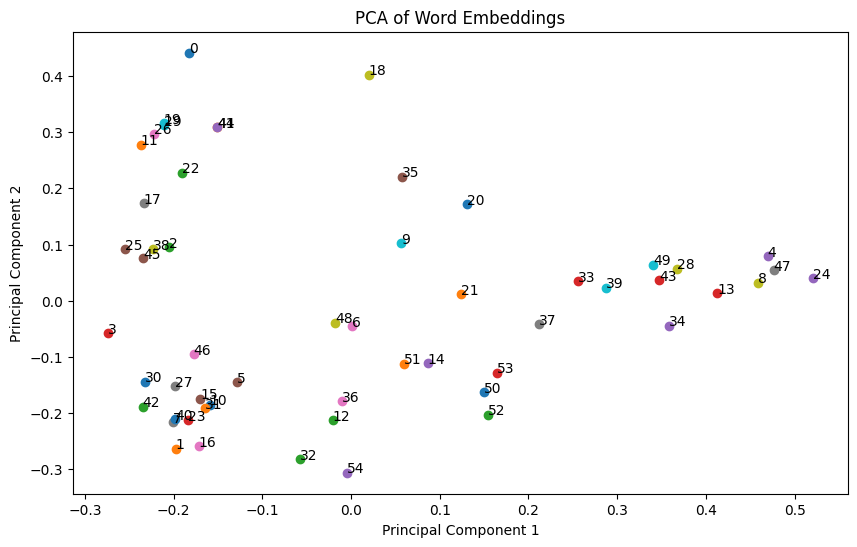

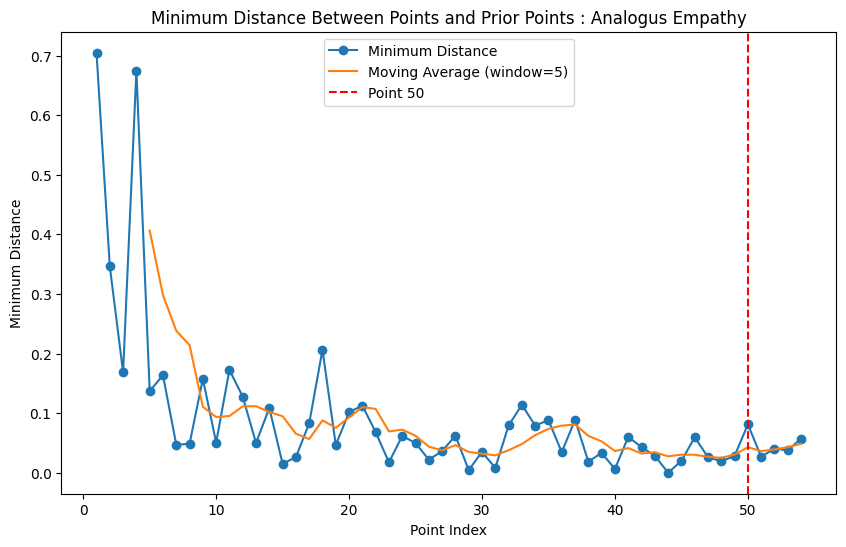

In [17]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'exp3_empathy.xlsx'
df = pd.read_excel(file_path)

# Extract the "ideas" column
ideas = df['ideas']

# Define a variable X for the number of rows to perform embedding on
X = 55  # Change this value to the desired number of rows
ideas_subset = ideas[:X]

# Perform word embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(ideas_subset)
df['vectors'] = embeddings.tolist()


# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the embedded vectors
plt.figure(figsize=(10, 6))
for i, point in enumerate(pca_result):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i))
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute the minimum distance between each point and all prior points
min_distances = []
for i in range(1, len(pca_result)):
    distances = [np.linalg.norm(pca_result[i] - pca_result[j]) for j in range(i)]
    min_distances.append(min(distances))

# Calculate the moving average of the minimum distances
window_size = 5  # Change this to your desired window size
moving_average = pd.Series(min_distances).rolling(window=window_size).mean()

# Plot the minimum distances and the moving average
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(min_distances) + 1), min_distances, marker='o', label='Minimum Distance')
plt.plot(range(1, len(min_distances) + 1), moving_average, label=f'Moving Average (window={window_size})')
plt.axvline(x=50, color='r', linestyle='--', label='Point 50')
plt.title('Minimum Distance Between Points and Prior Points : Analogus Empathy')
plt.xlabel('Point Index')
plt.ylabel('Minimum Distance')
plt.legend()
plt.show()


# Save DataFrame to Excel file
df.to_excel('exp3_empathy.xlsx', index=False, engine='openpyxl')